# Préparation et visualisation de la base 

In [1]:
#librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import os

## Première visualisation du dataset

In [10]:
def import_table () : 
    """
    INPUT : path
    
    GOAL : This function ask the user to enter a rooth path for exploiting the dataset, return a pandas dataframe
    
    RETURN : The dataframe base
    
    """
    rooth = input("Veuillez rentrer un chemin de fichier: " )
    rooth = rooth + '/diamond_final.csv'
    diamond = pd.read_csv(rooth, index_col=0)
    return diamond

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
import_table()

In [11]:
def drop_columns(): 
    """
    GOAL :  This function will drop a column 
    
    """
    diamond.drop('Unnamed: 0' , axis=1 , inplace=True)
    diamond.info()
    
drop_columns()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [63]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Pré-processing

In [12]:
def converter(cut):
    if cut == "Ideal":
        return int(1)
    elif cut == "Premium":
        return int(2)
    elif cut == "Very Good":
        return int(3)
    elif cut == "Good":
        return int (4)
    elif cut == "Fair":
        return int(5) 
diamond["cut"] = diamond["cut"].apply(converter)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
def converter(color):
    if color == "D":
        return int(1)
    elif color == "E":
        return int(2)
    elif color == "F":
        return int(3)
    elif color == "G":
        return int (4)
    elif color == "H":
        return int(5) 
    elif color == "I":
        return int(6) 
    elif color == "J":
        return int(7) 
diamond["color"] = diamond["color"].apply(converter)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
def converter(clarity):
    if clarity == "IF":
        return int(1)
    elif clarity == "VVS1":
        return int(2)
    elif clarity == "VVS2":
        return int(3)
    elif clarity == "VS1":
        return int (4)
    elif clarity == "VS2":
        return int(5)
    elif clarity == "SI1":
        return int(6)    
    elif clarity == "SI2":
        return int(7) 
    elif clarity == "I1":
        return int(8)   
diamond["clarity"] = diamond["clarity"].apply(converter)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,7,63.3,58.0,335,4.34,4.35,2.75


In [20]:
diamond.to_csv('/Users/david/projet-linux/Diamonds/Data/diamond_final.csv', sep=',')

## Visualisation

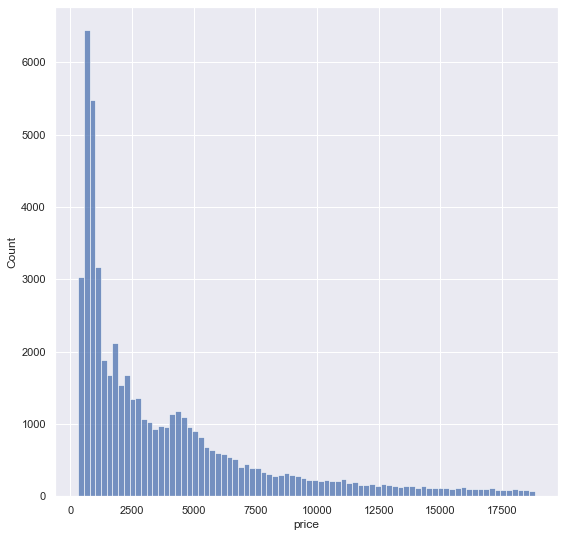

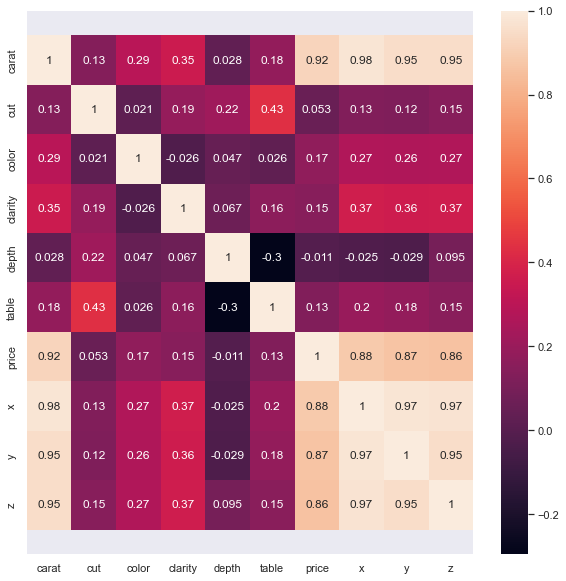

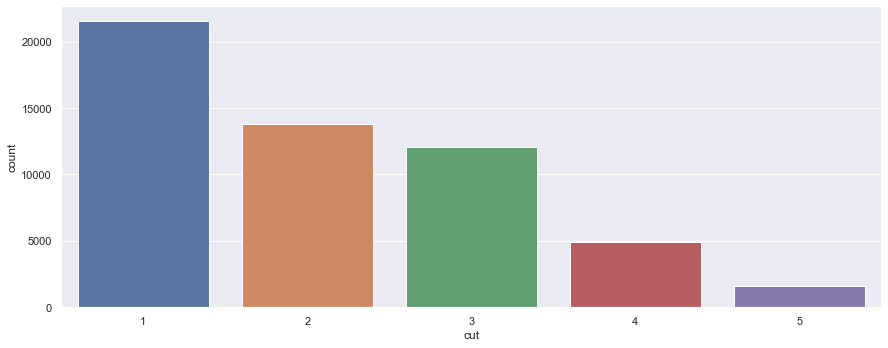

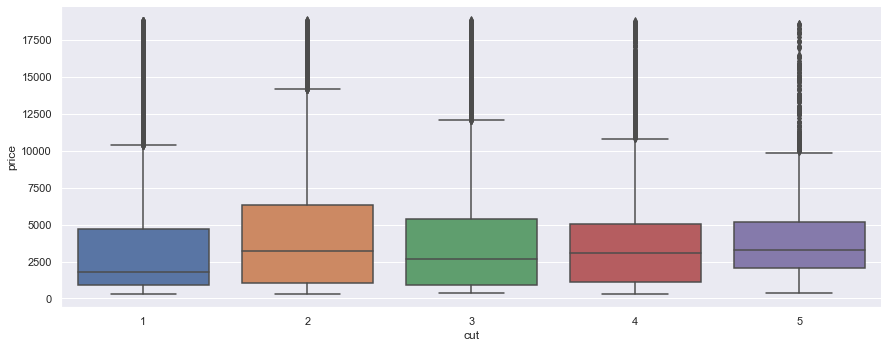

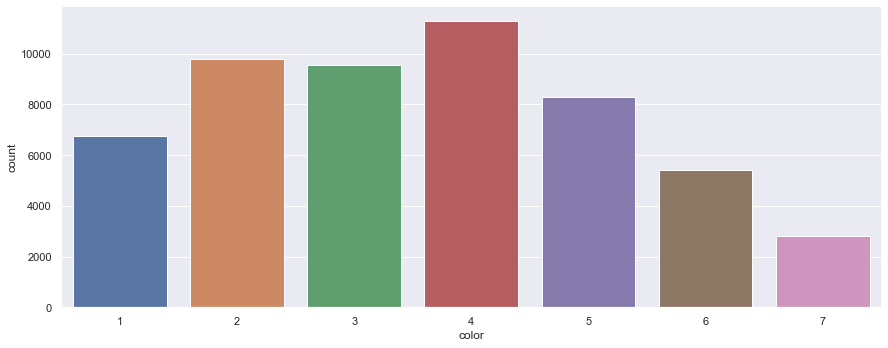

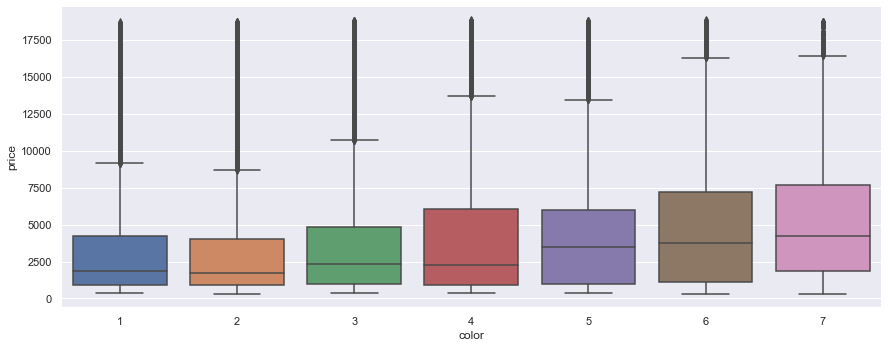

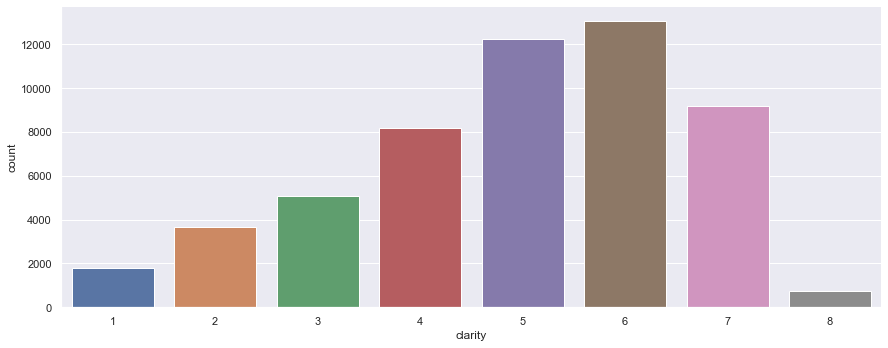

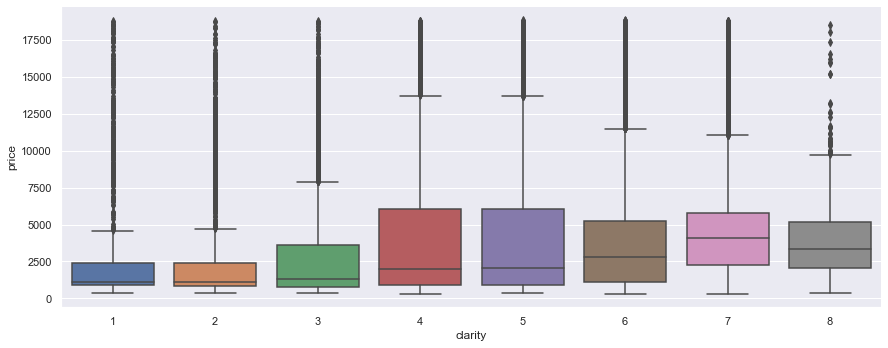

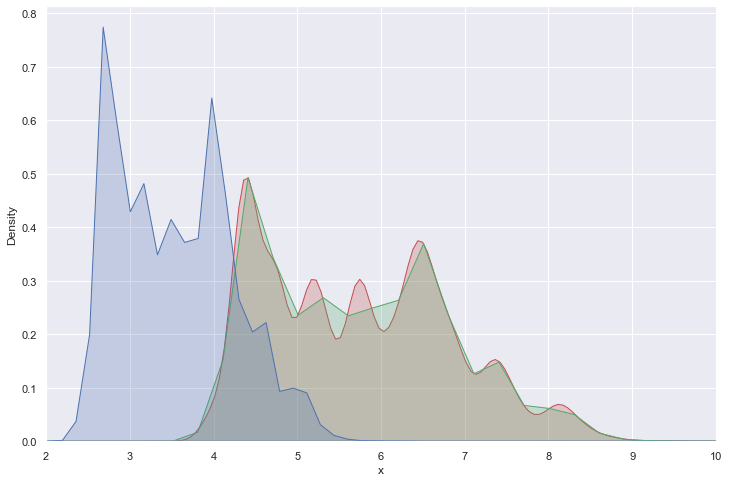

In [19]:
def data_vizualization() :
    """
    GOAL : Thanks to this function, it will returns severals graphs    
    """
    
    sns.set_theme()
    
    # ------------ PLOT 1 ---------
    #Analyse des prix en dollars
    plt.figure(figsize=(9,9))
    sns.histplot(diamond['price'])
    
    # ------------ PLOT 2 --------
    #Heatmap des corrélations
    corr_matrix = diamond.corr()

    #plt.subplots (figsize= (10,10))

    plt.figure(figsize=(10,10))
    ax=sns.heatmap(corr_matrix, annot = True, fmt='.2g')
    bottom, top=ax.get_ylim()
    ax.set_ylim(bottom+0.5, top -0.5)

    #Attention:
    #la profondeur est négativement corrélé à la table
    #Carat est fortement corrélé à plusieurs variables (prix, x, y, z)
    #Le carat a une grande influence sur le prix, car plus un diamant est grand, plus il est rare et donc cher
    #la longueur, largeur et hauteur sont fortement corrélées entre elles
    
    # ------------ PLOT 3 --------
    #la découpe 1 est la plus représentée
    sns.catplot(x='cut', data=diamond , kind='count',aspect=2.5 )

    #Cut relative au pix
    sns.catplot(x='cut', y='price', data=diamond, kind='box' ,aspect=2.5 )
    
    #------------ PLOT 4 -------
    ##Color
    sns.catplot(x='color', data=diamond , kind='count',aspect=2.5 )

    sns.catplot(x='color', y='price', data=diamond, kind='box' ,aspect=2.5 )
    #------------ PLOT 5 -------
    ##Clarity
    sns.catplot(x='clarity', data=diamond , kind='count',aspect=2.5 )
    sns.catplot(x='clarity', y='price', data=diamond, kind='box' ,aspect=2.5 )

    #------------ PLOT 6 -------
    ##Dimension
    plt.figure(figsize=(12,8))
    sns.kdeplot(diamond['x'] , shade=True , color='r' )
    sns.kdeplot(diamond['y'] , shade=True , color='g' )
    sns.kdeplot(diamond['z'] , shade= True , color='b')
    plt.xlim(2,10)

data_vizualization()

